In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [233]:
! pip install yellowbrick

In [234]:

df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [235]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

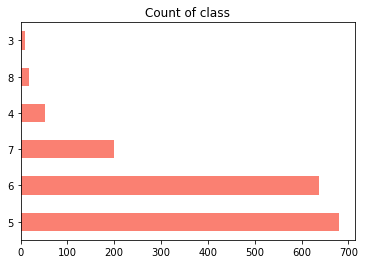

In [236]:
df.quality.value_counts().plot(kind='barh', title='Count of class', color='salmon')

In [237]:
def sea_plot(X,Y, label="Classes"):
    sns.scatterplot(X['alcohol'], X['chlorides'], hue=Y['quality'],
                    palette=c)
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()
    

In [238]:
def sea_plot1(X,Y, label="Classes"):
    sns.scatterplot(X['pH'], X['volatile acidity'], hue=Y['quality'],
                    palette=c1)
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()
    

In [239]:
c = sns.color_palette('Set2', 6)
c1 = sns.color_palette('cool', 6)

In [240]:
X = df.iloc[:, 0:11].copy()
Y = df.iloc[:, 11:].copy()
Y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [241]:
! pip install imblearn 

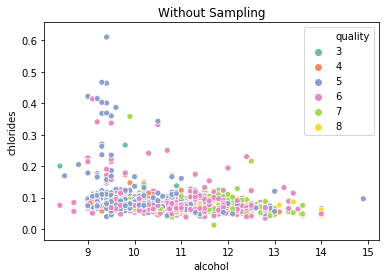

In [242]:
sea_plot(X,Y,'Without Sampling')

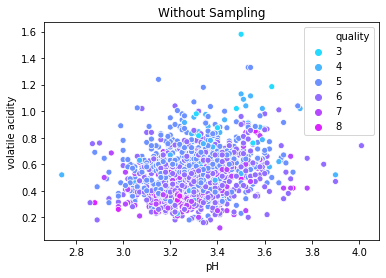

In [243]:
sea_plot1(X,Y,'Without Sampling')

In [244]:
from imblearn.under_sampling import RandomUnderSampler

ran = RandomUnderSampler()
x_ran, y_ran = ran.fit_sample(X,Y)

y_ran.quality.value_counts()

8    10
7    10
6    10
5    10
4    10
3    10
Name: quality, dtype: int64

In [245]:
from imblearn.under_sampling import TomekLinks 

tm = TomekLinks(sampling_strategy = 'all')
x_tm, y_tm = tm.fit_sample(X,Y)


y_tm.quality.value_counts()

5    589
6    533
7    166
4     32
8     10
3      5
Name: quality, dtype: int64

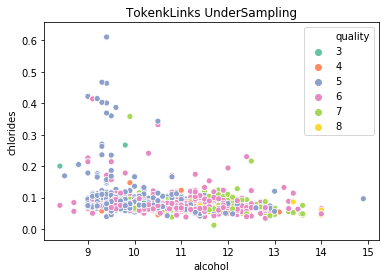

In [246]:
sea_plot(x_tm, y_tm, 'TokenkLinks UnderSampling')

In [247]:
from imblearn.over_sampling import SMOTE


sm = SMOTE()
x_sm, y_sm = sm.fit_sample(X,Y)

y_sm.quality.value_counts()

7    681
5    681
3    681
8    681
6    681
4    681
Name: quality, dtype: int64

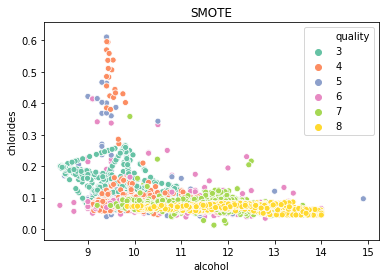

In [248]:
sea_plot(x_sm, y_sm,'SMOTE')

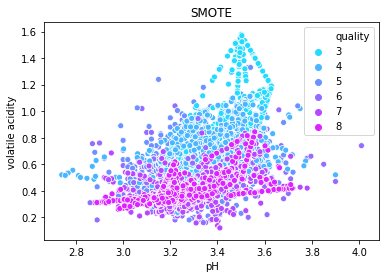

In [249]:
sea_plot1(x_sm, y_sm,'SMOTE')

In [250]:
from imblearn.over_sampling import SVMSMOTE

svm = SVMSMOTE(sampling_strategy='not majority',k_neighbors=4)
x_svm, y_svm = svm.fit_sample(X,Y)

y_svm.quality.value_counts()

7    681
5    681
6    681
8    325
4    281
3    240
Name: quality, dtype: int64

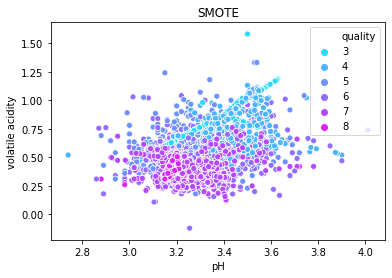

In [251]:
sea_plot1(x_svm, y_svm,'SMOTE')

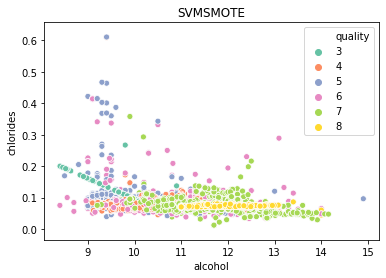

In [252]:
sea_plot(x_svm, y_svm,'SVMSMOTE')

In [253]:
from imblearn.combine import SMOTETomek

smtom = SMOTETomek(sampling_strategy='all')
x_smtm, y_smtm  = smtom.fit_sample(X,Y)

y_smtm.quality.value_counts()

3    678
8    670
7    667
4    660
5    618
6    601
Name: quality, dtype: int64

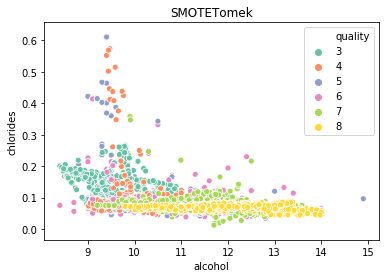

In [254]:
sea_plot(x_smtm, y_smtm,'SMOTETomek')

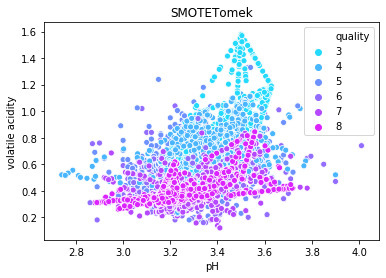

In [255]:
sea_plot1(x_sm, y_sm,'SMOTETomek')

In [256]:
from sklearn.model_selection import train_test_split

In [257]:
train_smx, test_smx, train_smy, test_smy = train_test_split(x_sm, y_sm, test_size=0.20)

In [258]:
train_svmx, test_svmx, train_svmy, test_svmy = train_test_split(x_svm, 
                                                                y_svm, test_size=0.20)

In [259]:
train_smtmx, test_smtmx, train_smtmy, test_smtmy = train_test_split(x_smtm, 
                                                                   y_smtm, test_size=0.20)

In [260]:
train_smx.shape

(3268, 11)

In [285]:
test_svmy.shape

(578, 1)

In [262]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm

In [263]:
rf = RandomForestClassifier()
# for smote
rf.fit(train_smx, train_smy.values.ravel())
y_predsm = rf.predict(test_smx)

In [264]:
cmat_sm = cm(test_smy, y_predsm)
cmat_sm

array([[137,   0,   0,   0,   0,   0],
       [  1, 112,   3,   1,   0,   0],
       [  1,   5, 103,  24,   1,   1],
       [  1,   4,  29,  80,  19,   4],
       [  0,   1,   1,   6, 138,   6],
       [  0,   0,   0,   0,   0, 140]])

In [265]:
rf = RandomForestClassifier()
# for smote
rf.fit(train_svmx, train_svmy.values.ravel())
y_predsvm = rf.predict(test_svmx)

In [266]:
cmat_svm = cm(test_svmy, y_predsvm)
cmat_svm

array([[ 45,   0,   0,   0,   0,   0],
       [  1,  55,   8,   0,   0,   0],
       [  0,   7, 109,  22,   3,   0],
       [  0,   0,  36,  86,  16,   0],
       [  0,   0,   1,   7, 125,   0],
       [  0,   0,   0,   2,   0,  55]])

In [267]:
rf = RandomForestClassifier()
# for smote
rf.fit(train_smtmx, train_smtmy.values.ravel())
y_predsmtm = rf.predict(test_smtmx)

In [268]:
cmat_smtm = cm(test_smtmy, y_predsmtm)
cmat_smtm

array([[147,   0,   0,   0,   0,   0],
       [  0, 109,   6,   0,   0,   0],
       [  1,   5, 105,  22,   1,   0],
       [  2,   2,  20,  86,  15,   2],
       [  0,   0,   0,   2, 127,   1],
       [  0,   0,   0,   0,   0, 126]])

In [269]:
from sklearn.metrics import ConfusionMatrixDisplay

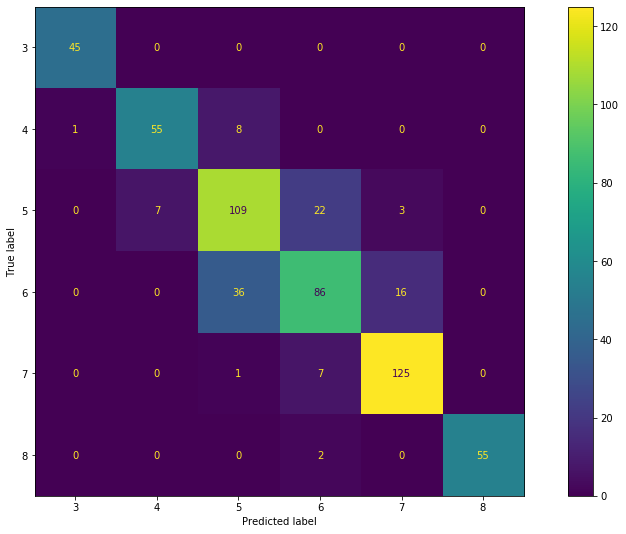

In [270]:
plt.rcParams['figure.figsize'] =[16,9]
cmd = ConfusionMatrixDisplay(cmat_svm, display_labels=['3','4','5','6','7','8'])
cmd.plot()

In [286]:
from yellowbrick.classifier import ClassificationReport

ImportError: cannot import name 'safe_indexing' from 'sklearn.utils' (/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/__init__.py)

In [287]:
clr = ClassificationReport(rf, support=True)
clr.fit(train_smx, train_smy)
clr.score(test_smx, test_smy)
clr.show()

NameError: name 'ClassificationReport' is not defined

In [288]:
from sklearn.metrics import classification_report


In [289]:
cl1 = classification_report(test_smtmy, y_predsmtm, output_dict=True)
c_rep = pd.DataFrame(cl1).T
c_rep

,f1-score,precision,recall,support
3,0.989899,0.980000,1.000000,147.000000
4,0.943723,0.939655,0.947826,115.000000
5,0.792453,0.801527,0.783582,134.000000
6,0.725738,0.781818,0.677165,127.000000
7,0.930403,0.888112,0.976923,130.000000
8,0.988235,0.976744,1.000000,126.000000
accuracy,0.898588,0.898588,0.898588,0.898588
macro avg,0.895075,0.894643,0.897583,779.000000
weighted avg,0.895855,0.895173,0.898588,779.000000


In [290]:
c_rep1 = c_rep.copy()
c_rep1['support'] = c_rep1.support.apply(int)
c_rep1.style.background_gradient(cmap='viridis',
                                 subset=pd.IndexSlice['3':'8',:'recall'])

,f1-score,precision,recall,support
3,0.989899,0.98,1,147
4,0.943723,0.939655,0.947826,115
5,0.792453,0.801527,0.783582,134
6,0.725738,0.781818,0.677165,127
7,0.930403,0.888112,0.976923,130
8,0.988235,0.976744,1,126
accuracy,0.898588,0.898588,0.898588,0
macro avg,0.895075,0.894643,0.897583,779
weighted avg,0.895855,0.895173,0.898588,779
